In [1]:
import numpy as np
from numpy import pi, sqrt, real, imag
import matplotlib
from matplotlib import pyplot as plt
import ipywidgets as ipw
from scipy.constants import epsilon_0,hbar
%matplotlib inline

# Analytics

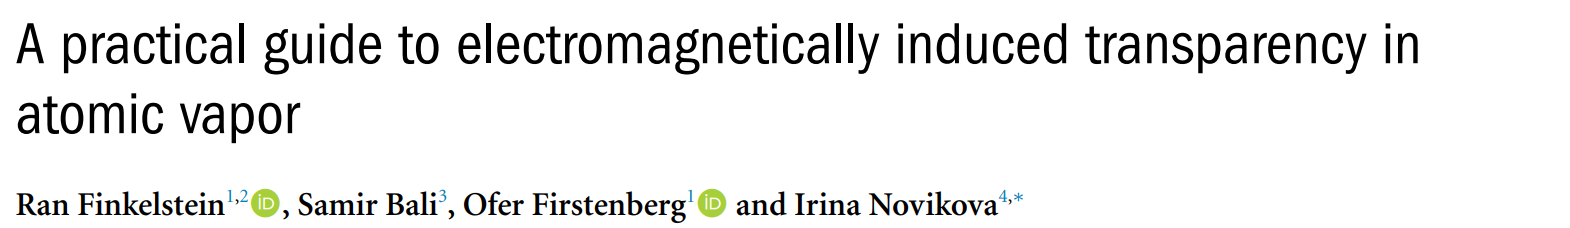
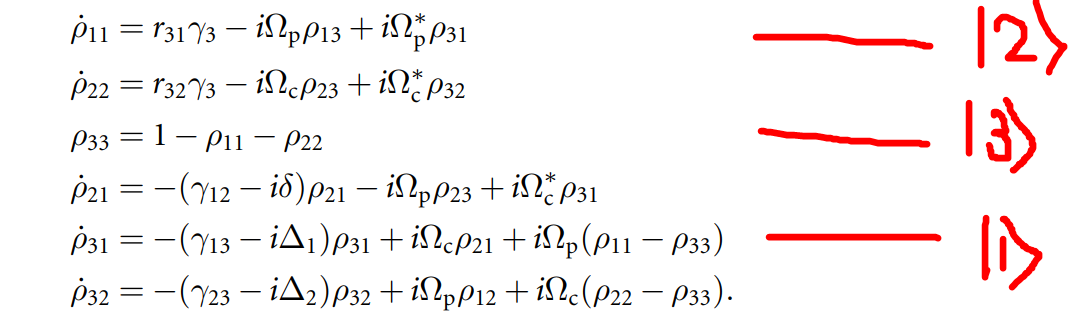
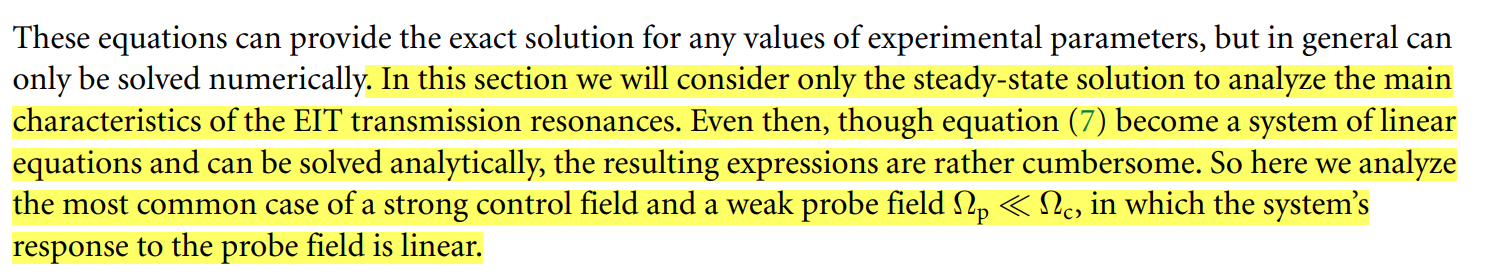
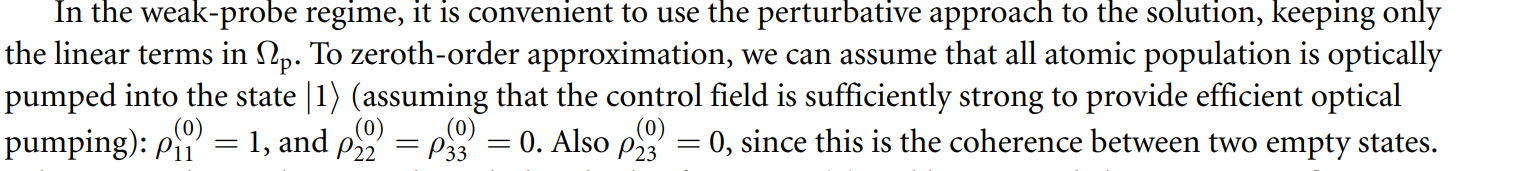
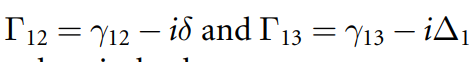
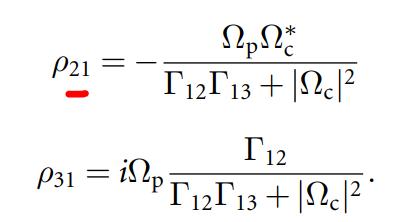
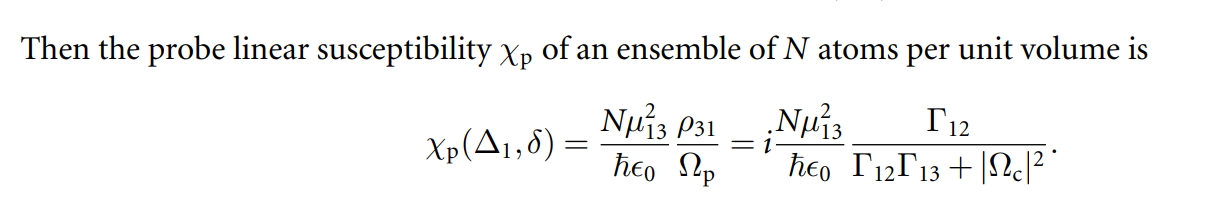

## Beer Lambert law

![WhatsApp Image 2024-10-25 at 02.14.39_63a10e4f.jpg](<attachment:WhatsApp Image 2024-10-25 at 02.14.39_63a10e4f.jpg>)
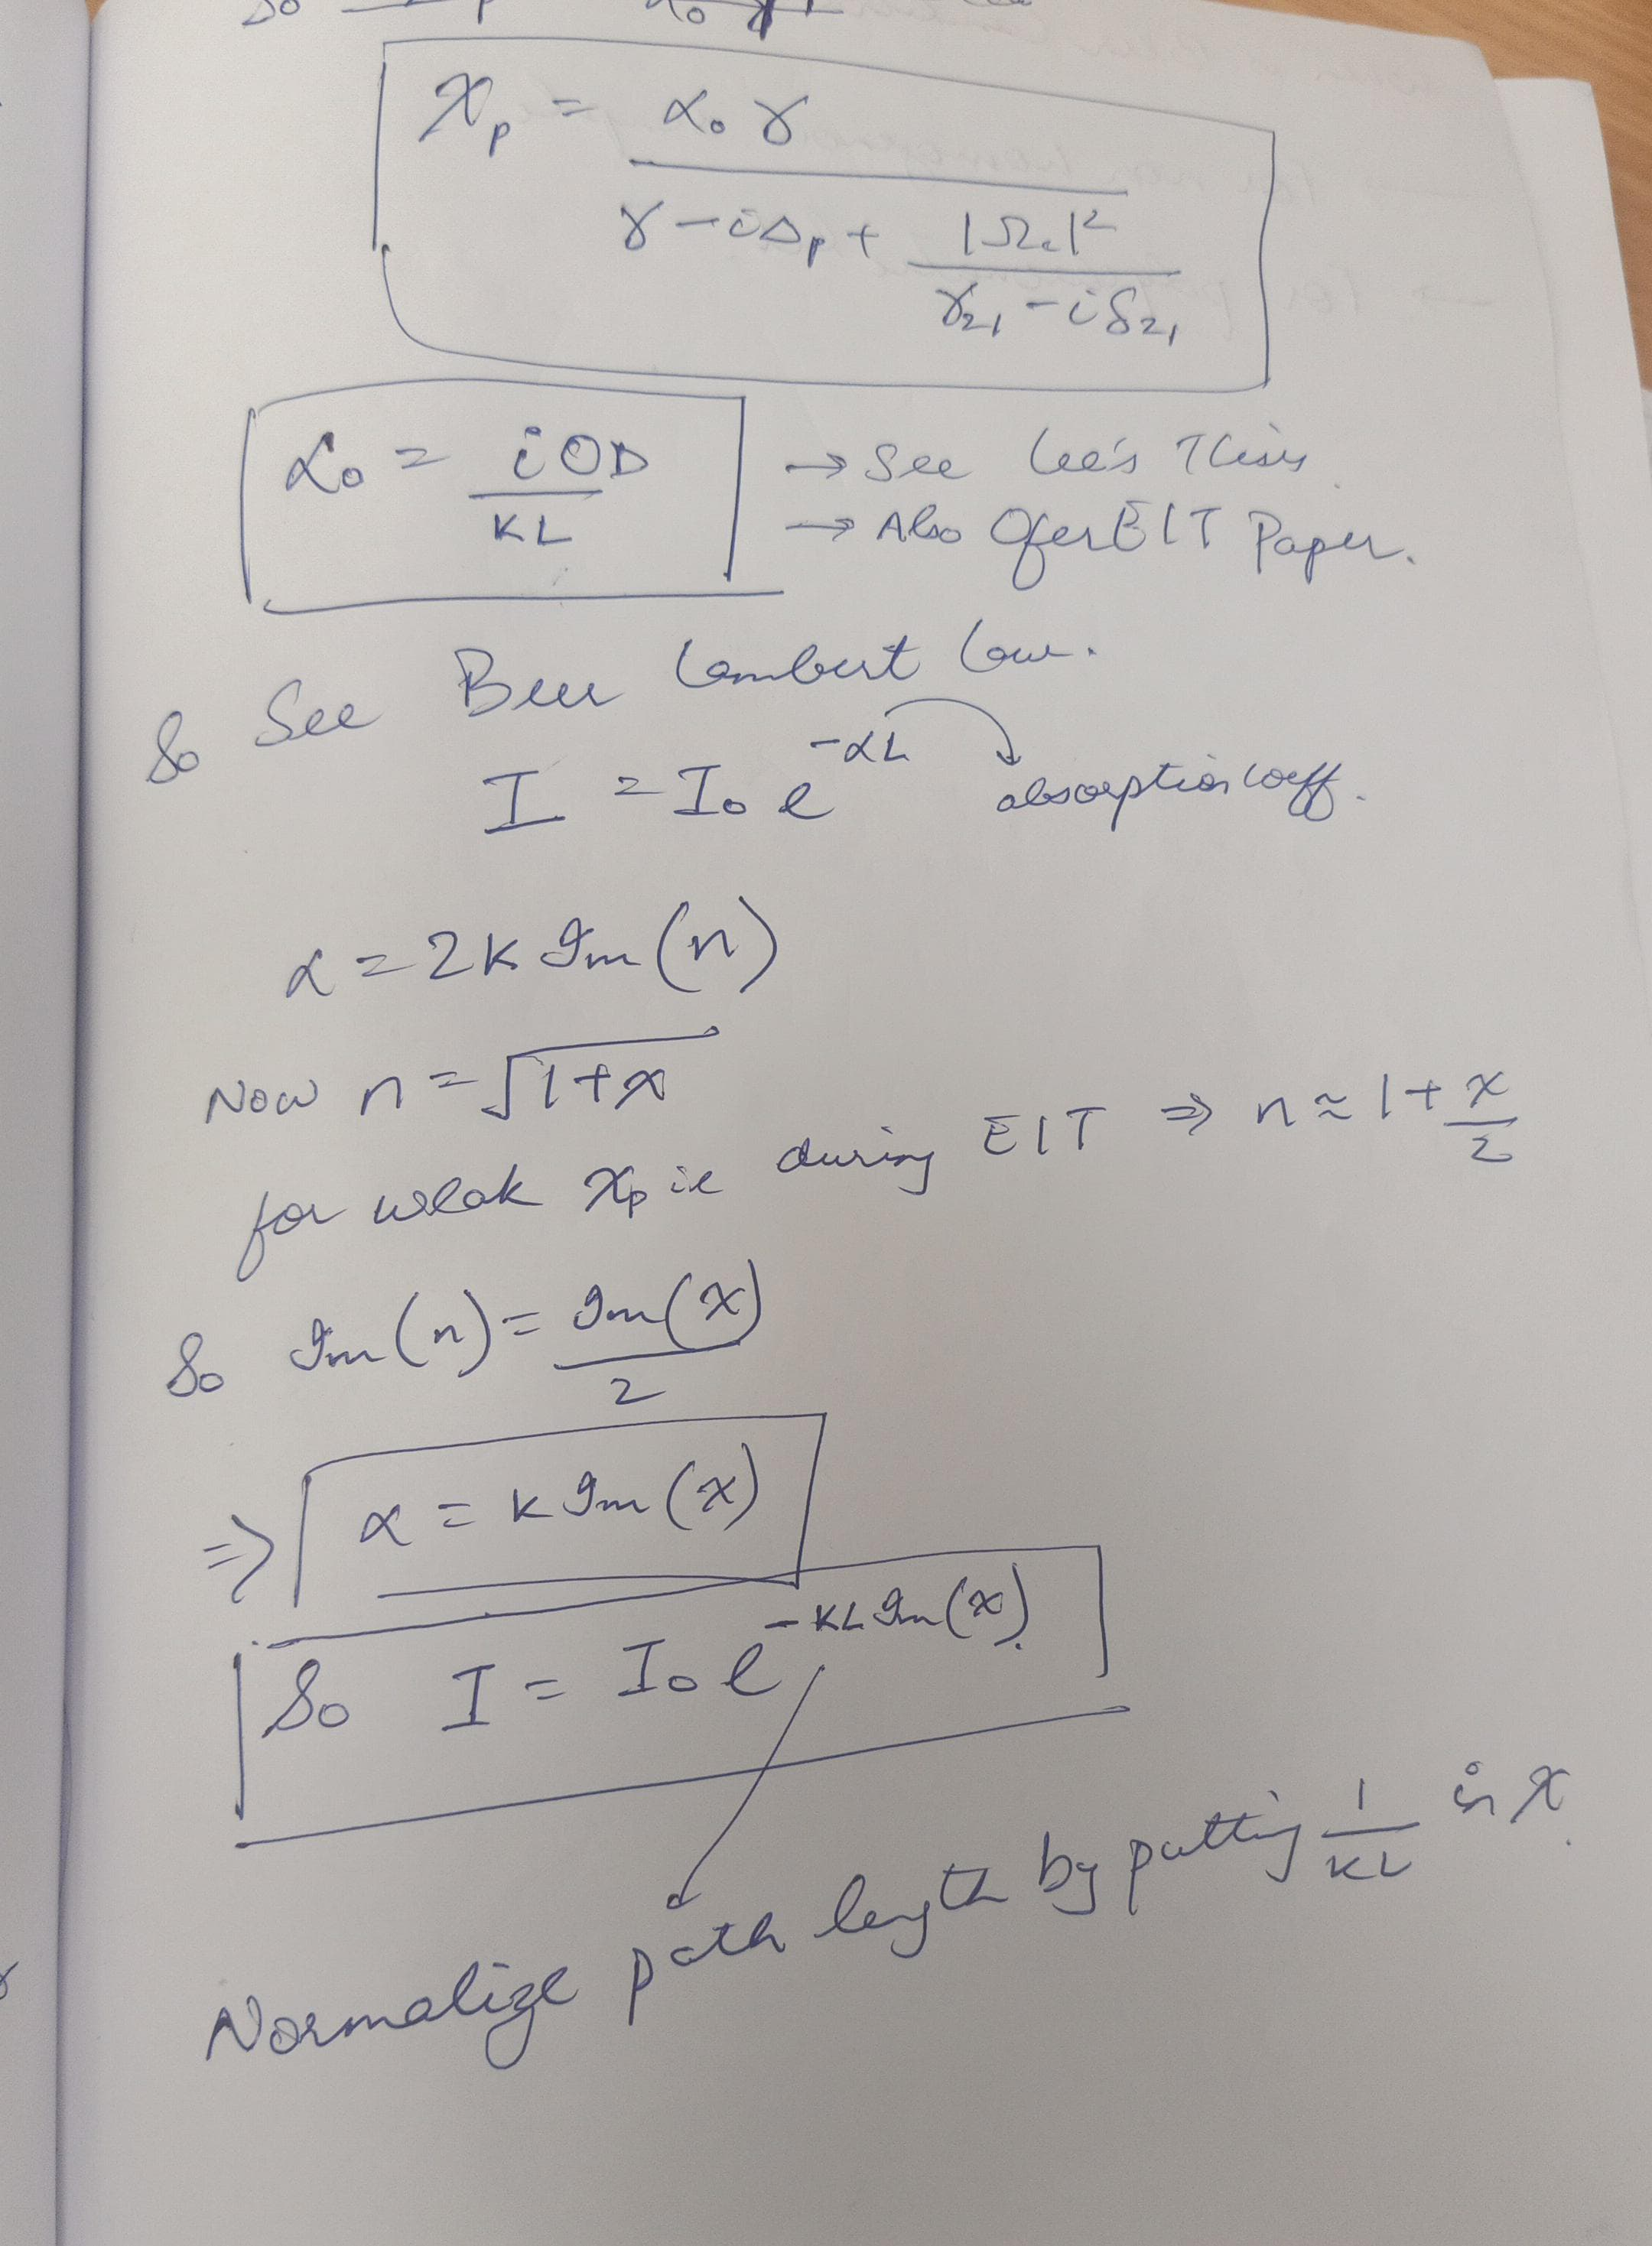

# Analytical code for multi level ladder system
![WhatsApp Image 2024-10-25 at 03.03.42_7428ff56.jpg](<attachment:WhatsApp Image 2024-10-25 at 03.03.42_7428ff56.jpg>)
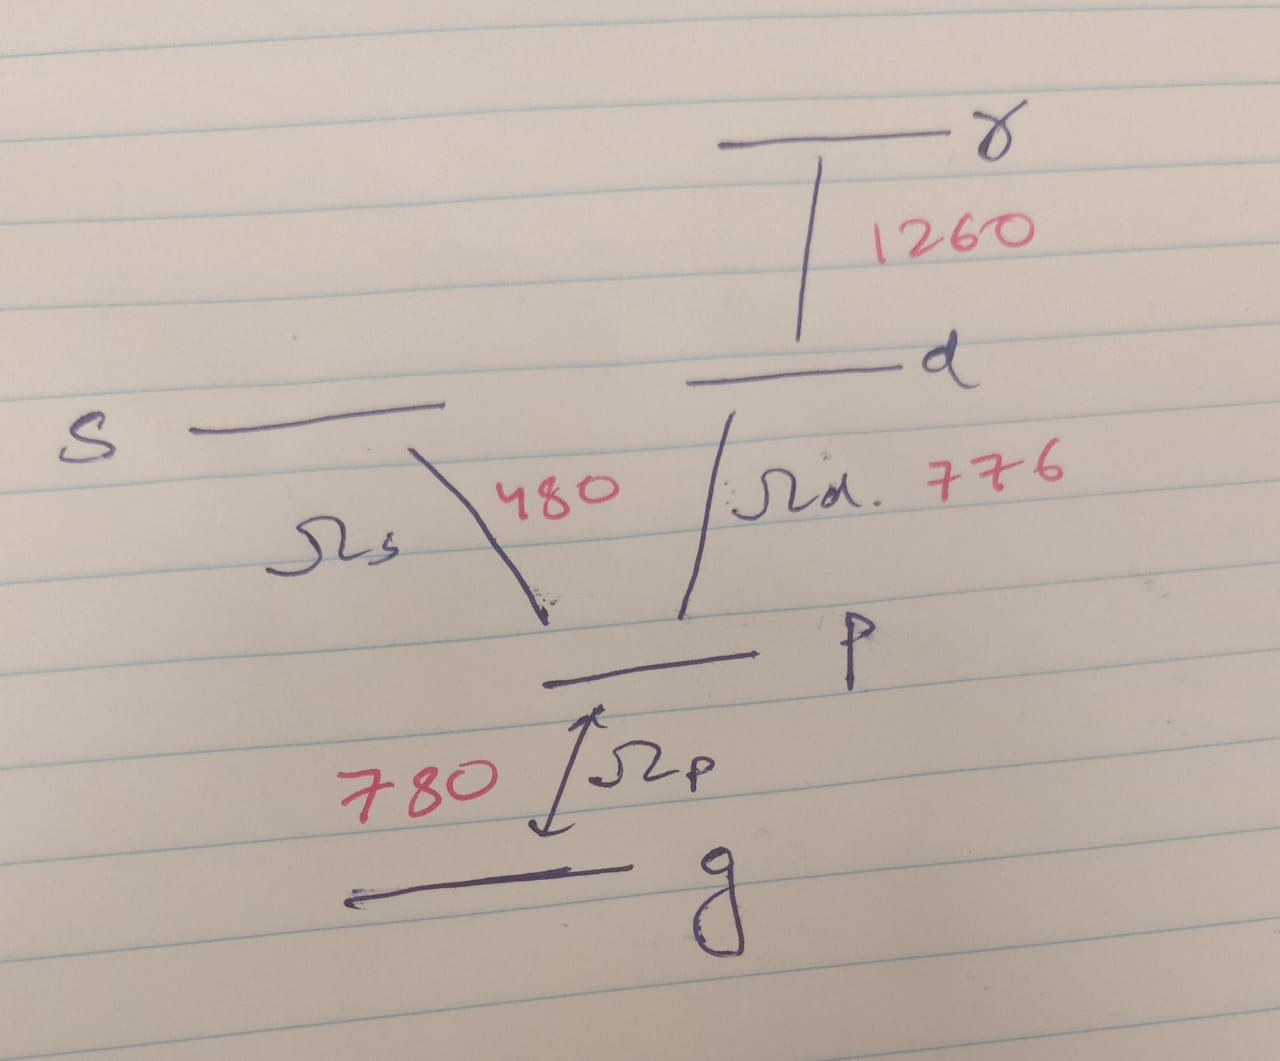

<!-- $$
\text{\Huge $\chi = \frac{i \cdot \text{od} \cdot \Gamma}{\Gamma - i (\omega + \Delta_p) + \frac{\Omega_s^2}{\gamma_{gs} - i (\omega + \Delta_p + \Delta_s)} + \frac{\Omega_d^2}{\gamma_{gd} - i (\omega + \Delta_p + \Delta_d) + \frac{\Omega_r^2}{\gamma_{gr} - i (\omega + \Delta_p + \Delta_d + \Delta_r)}}}$}
$$ -->

$$
\text{\Huge $\chi = \frac{i \cdot \text{od} \cdot \Gamma}{\Gamma - i (  \Delta_p) + \frac{\Omega_s^2}{\gamma_{gs} - i ( \Delta_p + \Delta_s)} + \frac{\Omega_d^2}{\gamma_{gd} - i (  \Delta_p + \Delta_d) + \frac{\Omega_r^2}{\gamma_{gr} - i ( \Delta_p + \Delta_d + \Delta_r)}}}$}
$$


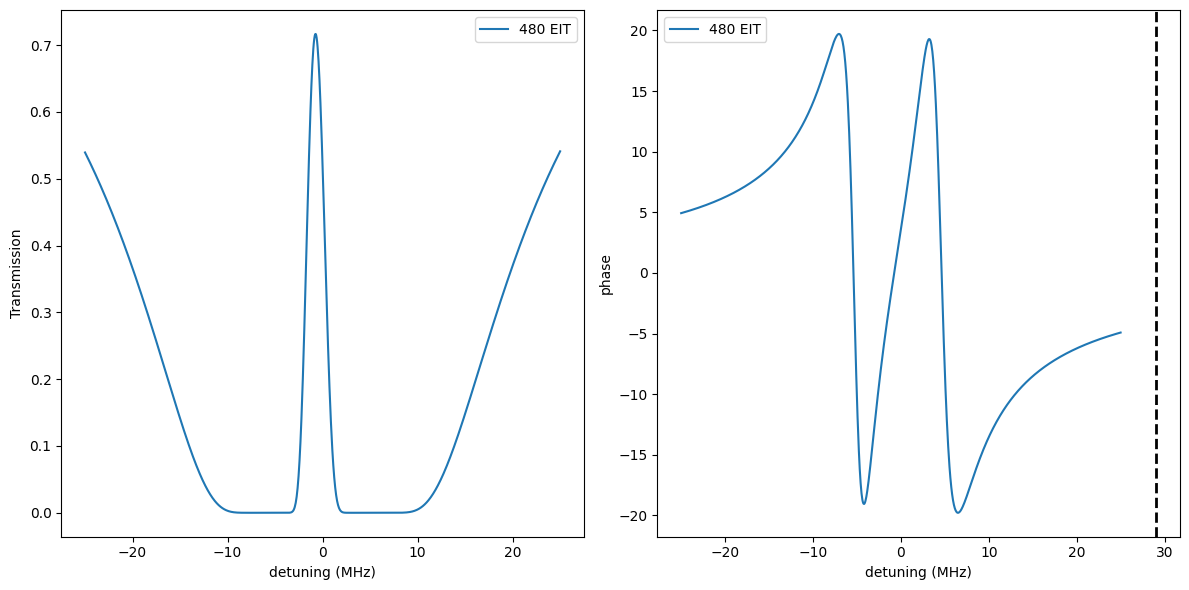

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the EIT_temp function
def multi_level(od, Gamma, gamma_gs, gamma_gd, gamma_gr, omega, Delta_p, Delta_s, Omega_s, Omega_d, Omega_r, Delta_d, Delta_r):
    chi = 1j * od * Gamma / (
        Gamma - 1j * (omega + Delta_p) +
        Omega_s**2 / (gamma_gs - 1j * (omega + Delta_p + Delta_s)) +
        Omega_d**2 / (gamma_gd - 1j * (omega + Delta_p + Delta_d) +
        Omega_r**2 / (gamma_gr - 1j * (omega + Delta_p + Delta_d + Delta_r)))
    )
    return chi

# Parameters
Omega_s = 5
Omega_d = 0
Omega_r = 0
omega = 0  
od = 40
Gamma = 3
gamma_gs = 0.07
gamma_gd = 0.1
gamma_gr = 0
Delta_p = np.linspace(-25, 25, int(1e3))
Delta_s = 0.76
Delta_d = -28
Delta_r = 0

# Calculate chi for both cases
chi = multi_level(od, Gamma, gamma_gs, gamma_gd, gamma_gr, omega, Delta_p, Delta_s, Omega_s, Omega_d, Omega_r, Delta_d, Delta_r)
# chi_two = EIT_temp(od, Gamma, gamma_gs, gamma_gd, gamma_gr, omega, Delta_p, Delta_s, 0, Omega_d, Omega_r, Delta_d, Delta_r)


if (Omega_s != 0 & Omega_d != 0):
    label = '480 and 776 EIT'
elif (Omega_s != 0 & Omega_d == 0):
    label = '480 EIT'
elif (Omega_s == 0 & Omega_d != 0):
    label = '776 EIT'    


# Plotting
plt.figure(figsize=(12, 6))

# Transmission plot
plt.subplot(1, 2, 1)
plt.plot(Delta_p, np.exp(-np.imag(chi)), label=label)
# plt.plot(Delta_p, np.exp(-np.imag(chi_two)), label='blocked with 776 EIT')
# plt.axvline(29.055, linestyle='--', color='k', linewidth=2, label='work point')
plt.legend()
plt.xlabel('detuning (MHz)')
plt.ylabel('Transmission')

# Phase plot
plt.subplot(1, 2, 2)
plt.plot(Delta_p, np.real(chi), label=label)
# plt.plot(Delta_p, np.real(chi_two), label='blocked with 776 EIT')
plt.axvline(29.055, linestyle='--', color='k', linewidth=2)
plt.xlabel('detuning (MHz)')
plt.ylabel('phase')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Define the multi_level function
def multi_level(od, Γ, γ_gs, γ_gd, γ_gr, ω, Δ_p, Δ_s, Ω_s, Ω_d, Ω_r, Δ_d, Δ_r):
    χ = 1j * od * Γ / (
        Γ - 1j * (ω + Δ_p) +
        Ω_s**2 / (γ_gs - 1j * (ω + Δ_p + Δ_s)) +
        Ω_d**2 / (γ_gd - 1j * (ω + Δ_p + Δ_d) +
        Ω_r**2 / (γ_gr - 1j * (ω + Δ_p + Δ_d + Δ_r)))
    )
    return χ

# Function to update the plot
def update_plot(Ω_s, Ω_d, Ω_r, ω, od, Γ, γ_gs, γ_gd, γ_gr, Δ_s, Δ_d, Δ_r):
    Δ_p = np.linspace(-55, 55, int(1e3))
    χ = multi_level(od, Γ, γ_gs, γ_gd, γ_gr, ω, Δ_p, Δ_s, Ω_s, Ω_d, Ω_r, Δ_d, Δ_r)
    
    if (Ω_s != 0 and Ω_d != 0):
        label = '480 and 776 EIT'
    elif (Ω_s != 0 and Ω_d == 0):
        label = '480 EIT'
    elif (Ω_s == 0 and Ω_d != 0):
        label = '776 EIT'
    else:
        label = 'No EIT'

    plt.figure(figsize=(12, 6))

    # Transmission plot
    plt.subplot(1, 2, 1)
    plt.plot(Δ_p, np.exp(-np.imag(χ)), label=label)
    plt.legend()
    plt.xlabel('Detuning Δ_p (MHz)')
    plt.ylabel('Transmission')

    # Phase plot
    plt.subplot(1, 2, 2)
    plt.plot(Δ_p, np.real(χ), label=label)
    plt.xlabel('Detuning Δ_p (MHz)')
    plt.ylabel('Phase')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create interactive widgets
interact(update_plot,
    Ω_s=widgets.FloatSlider(min=0, max=10, step=0.1, value=5, description='Ω_s'),
    Ω_d=widgets.FloatSlider(min=0, max=10, step=0.1, value=0, description='Ω_d'),
    Ω_r=widgets.FloatSlider(min=0, max=10, step=0.1, value=0, description='Ω_r'),
    ω=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='ω'),
    od=widgets.FloatSlider(min=0, max=100, step=1, value=40, description='od'),
    Γ=widgets.FloatSlider(min=0, max=10, step=0.1, value=3, description='Γ'),
    γ_gs=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.07, description='γ_gs'),
    γ_gd=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1, description='γ_gd'),
    γ_gr=widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description='γ_gr'),
    Δ_s=widgets.FloatSlider(min=-50, max=50, step=0.1, value=0.76, description='Δ_s'),
    Δ_d=widgets.FloatSlider(min=-50, max=50, step=0.1, value=-28, description='Δ_d'),
    Δ_r=widgets.FloatSlider(min=-50, max=50, step=0.1, value=0, description='Δ_r')
)

interactive(children=(FloatSlider(value=5.0, description='Ω_s', max=10.0), FloatSlider(value=0.0, description=…

<function __main__.update_plot(Ω_s, Ω_d, Ω_r, ω, od, Γ, γ_gs, γ_gd, γ_gr, Δ_s, Δ_d, Δ_r)>

# Numerics using qutip